# __Chronic Kidney Disease Prediction__
---

## INTRODUCTION

In this project, we will implement 2 machine learning models, namely **Random Forest** and **XGBoost**, and also evaluate the performance for each algorithm.

The data was taken over 2-month period in India with 24 health related attributes of 400 patients (eg, red blood cell count, white blood cell count, etc).

The target is to predict the 'class', which is either 'ckd' or 'notckd'. (ckd=chronic kidney disease, notckd= not chronic kidney disease)

## DATA IMPORTING

First, let's import libraries and dataset used for processing data and visualisation.

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
from numpy import nan
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #Also known as Information Gain
from sklearn.feature_selection import chi2

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

from sklearn.model_selection import cross_val_score # Cross Validation
from sklearn.model_selection import StratifiedKFold # K-Fold Cross Validation

In [172]:
df = pd.read_csv("D:\Kidney Project\kidney_disease.csv")
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [173]:
df.shape

(400, 26)

### Data Dictionary
    age - age
    bp - blood pressure
    sg - specific gravity
    al - albumin
    su - sugar
    rbc - red blood cells
    pc - pus cell
    pcc - pus cell clumps
    ba - bacteria
    bgr - blood glucose random
    bu - blood urea
    sc - serum creatinine
    sod - sodium
    pot - potassium
    hemo - haemoglobin
    pcv - packed cell volume
    wc - white blood cell count
    rc - red blood cell count
    htn - hypertension
    dm - diabetes mellitus
    cad - coronary artery disease
    appet - appetite
    pe - pedal edema
    ane - anemia
    classification - class

## DATA PREPROCESSING

First, we will rename column names to make it more user-friendly.

In [174]:
data_dict = pd.read_csv("D:\Kidney Project\data_description.txt",sep="-")
data_dict.reset_index(inplace=True)
data_dict.columns = ['Col','Col_name']
data_dict

,Col,Col_name
0,id,id
1,age,age
2,bp,blood pressure
3,sg,specific gravity
4,al,albumin
5,su,sugar
6,rbc,red blood cells
7,pc,pus cell
8,pcc,pus cell clumps
9,ba,bacteria


In [175]:
df.columns = data_dict["Col_name"].values

In [176]:
df.head()

,id,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [177]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
pus cell                    object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

> Noticed that **red_blood_cell_count**, **packed_cell_volume** and **white_blood_cell_count** are object type while they should be numerical type. We will change them.

In [178]:
features=['red blood cell count','packed cell volume','white blood cell count']
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [179]:
for feature in features:
    convert_dtype(df,feature)

> We will drop the id column since it seems to be an unique identifier for rows so it won't 
help us to find any insights from the data.


In [180]:
df.drop(["id"],axis=1,inplace=True)

> **Now, we need to extract numerical and categorical features to analyse.**

In [181]:
def extract_features(df):
    cat_col = [col for col in df.columns if df[col].dtype=="object"]
    num_col = [col for col in df.columns if df[col].dtype!="object"]
    return cat_col,num_col

In [182]:
cat_col,num_col= extract_features(df)

In [183]:
cat_col

['red blood cells',
 'pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [184]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

In [185]:
# Total unique categories in our categorical features to check if any dirtiness in data or not
for col in cat_col:
    print("Feature {} has unique values: {}".format(col,df[col].unique()))
    print('\n')

Feature red blood cells has unique values: [nan 'normal' 'abnormal']


Feature pus cell has unique values: ['normal' 'abnormal' nan]


Feature pus cell clumps has unique values: ['notpresent' 'present' nan]


Feature bacteria has unique values: ['notpresent' 'present' nan]


Feature ypertension has unique values: ['yes' 'no' nan]


Feature diabetes mellitus has unique values: ['yes' 'no' ' yes' '\tno' '\tyes' nan]


Feature coronary artery disease has unique values: ['no' 'yes' '\tno' nan]


Feature appetite has unique values: ['good' 'poor' nan]


Feature pedal edema has unique values: ['no' 'yes' nan]


Feature anemia has unique values: ['no' 'yes' nan]


Feature class has unique values: ['ckd' 'ckd\t' 'notckd']




> As you can see, we need to correct 2 features and the target variable which contain certain discrepancy in some values.

In [186]:
#Replace incorrect values
df["diabetes mellitus"].replace(to_replace = {' yes':'yes','\tno':'no','\tyes':'yes'},inplace=True)

df["coronary artery disease"].replace(to_replace='\tno',value='no',inplace=True)

df["class"].replace(to_replace='ckd\t',value='ckd',inplace=True)

## EXPLANATORY DATA ANALYSIS

In this part, we will do so many EDA to find useful insight about relationships between independent and dependent variables. 

### 1. Visualization

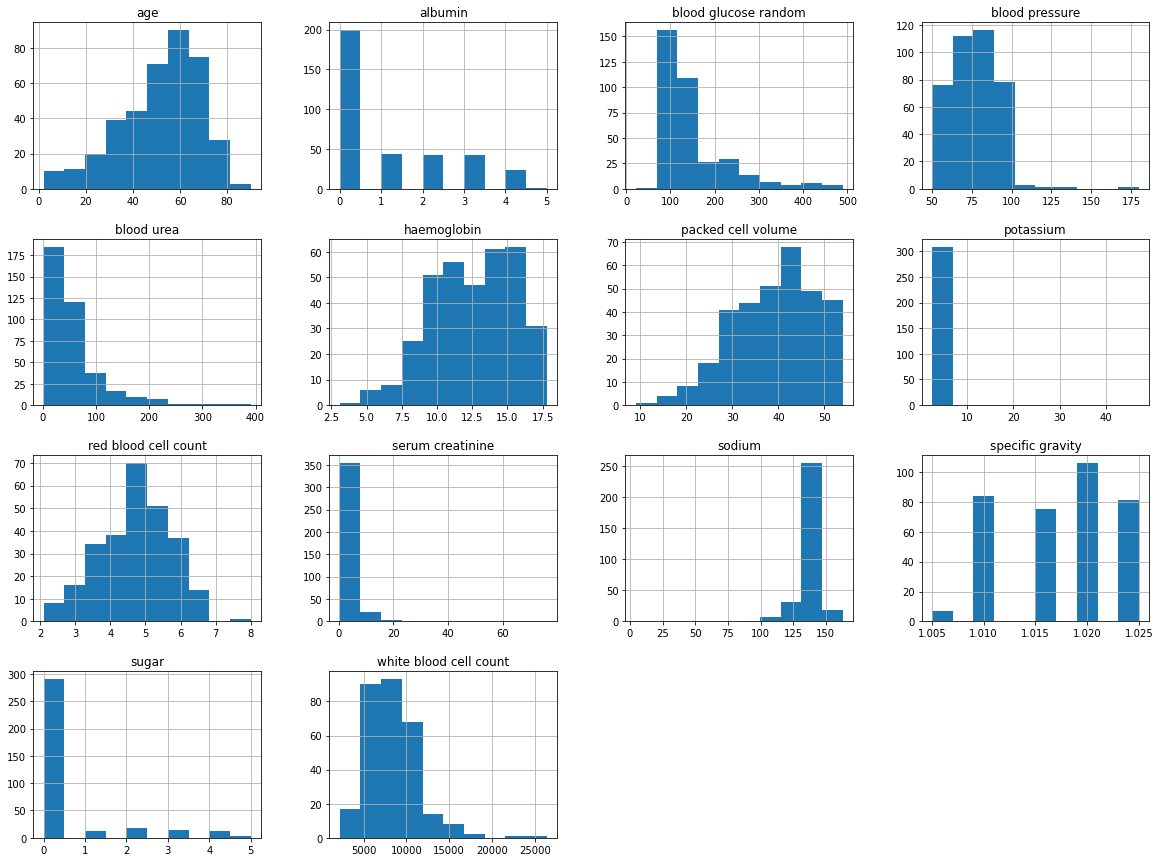

In [187]:
df[num_col].hist(bins=10, figsize=(20, 15))
plt.show()

    Observations:
        - Age seems to be left skewed.
        - Blood gluscose random is right skewed.
        - Blood Urea is also a bit right skewed.
        - Rest of the features are slightly skewed.

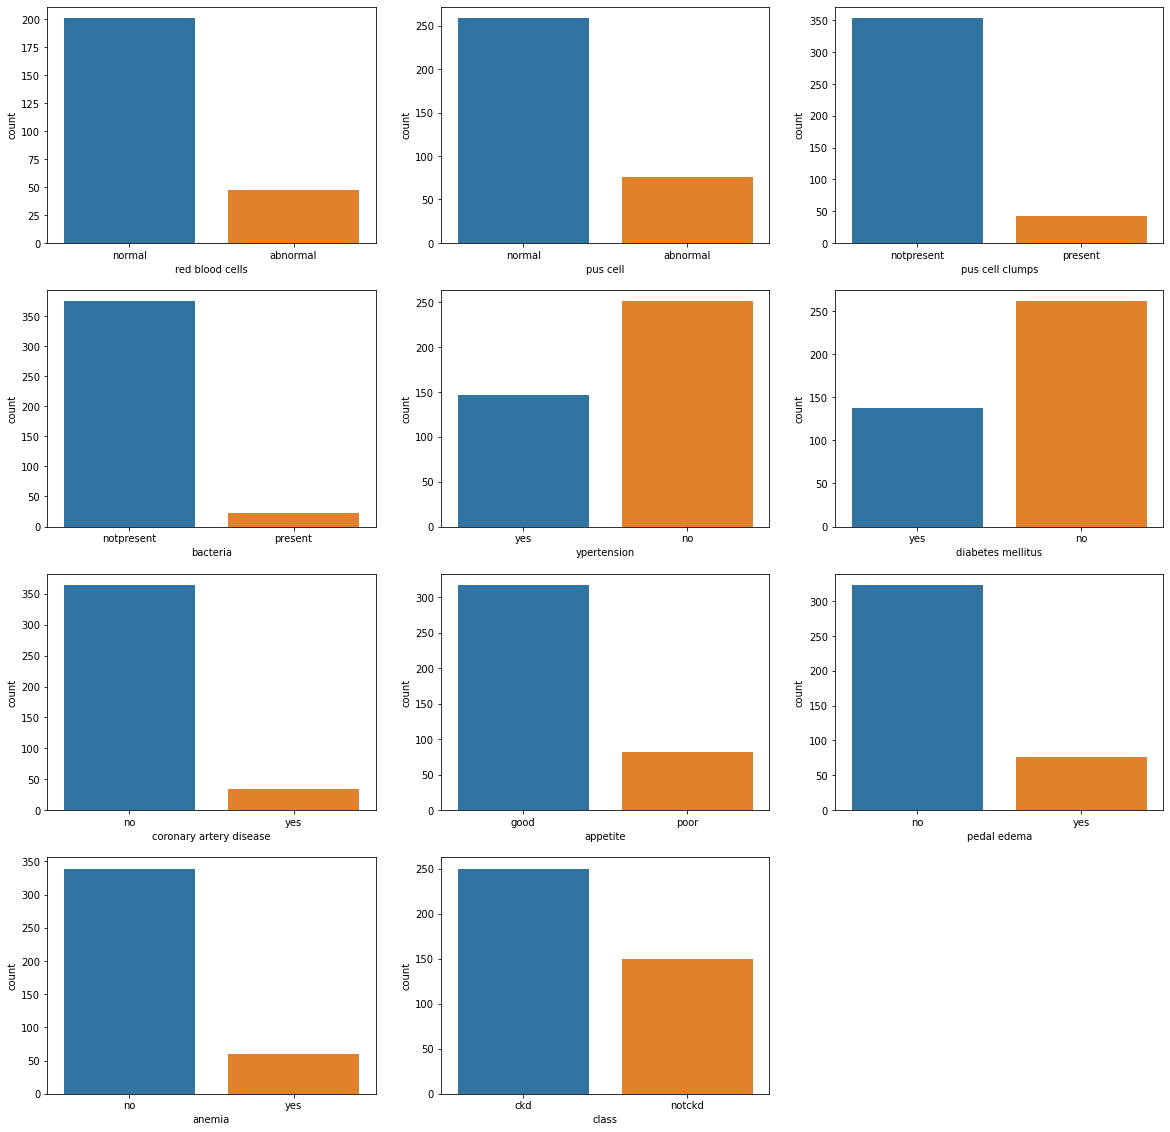

In [188]:
plt.figure(figsize=(20,20))
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])

Text(0.5, 1.0, 'Target Class')

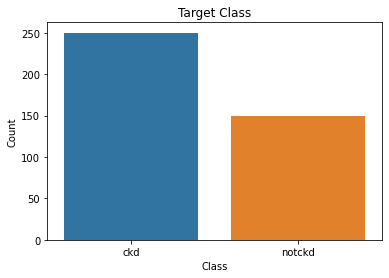

In [189]:
sns.countplot(x='class',data=df)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Target Class")

### 2. Correlations

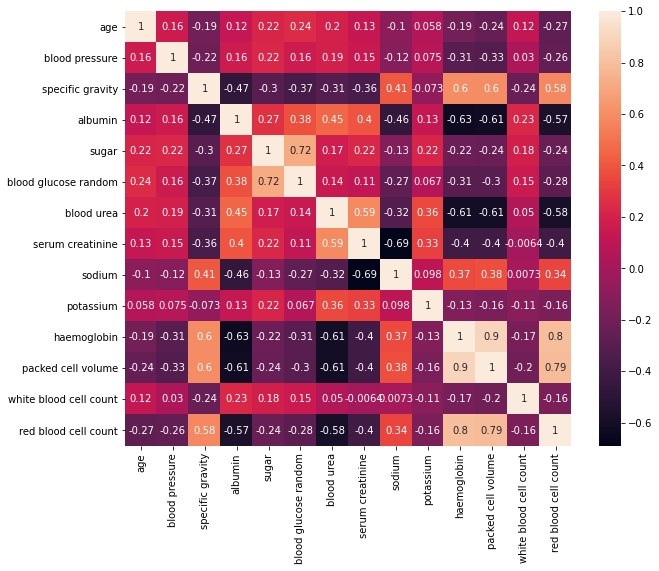

In [190]:
plt.figure(figsize=(10,8))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)

    Positive Correlation:
    
    Specific Gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red blood cell count <- Packed cell volume
    
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, Packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [191]:
df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5

> #### Check for positive correlation and its impact on the class

In [192]:
# Defining violin and scatter plot & kde_plot functions
def violin(col):
    ax = sns.violinplot(x="class",y=col,data=df,hue=df["class"])
    plt.show()
def scatter(col1,col2):
    sns.scatterplot(df[col1],df[col2],data=df,hue='class')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
def kde_plot(col):
    grid = sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

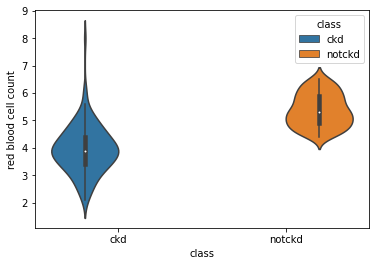

In [193]:
violin('red blood cell count')

        Observation:
        - Red blood cell counts range from 1.5 to 4 are mostly classified as positive for chronic kidney disease(i.e ckd).

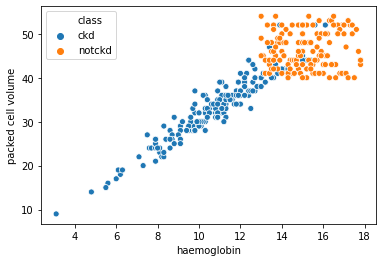

In [194]:
scatter('haemoglobin','packed cell volume')

        Observations:
        - There is a linear trend between packed cell volumn and haemoglobin.
        - Packed cell volumn range from ~8 to 40 and Haemoglobin between 3 to <13 are mostly classified as positive for 
        chronic kidney disease (i.e ckd).

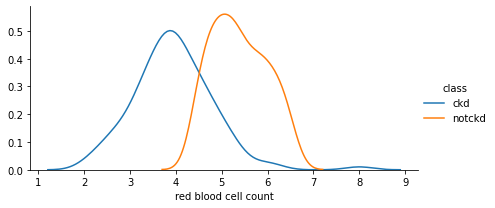

In [195]:
kde_plot('red blood cell count')

    Both distributions are quite different. The ckd distribution is nearly normal and evenly distributed while the notckd 
    distribution is slightly left-skewed but quite close to a normal distribution.

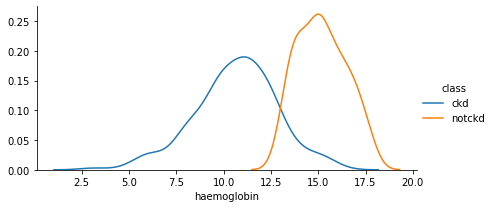

In [196]:
kde_plot('haemoglobin')

    As the figure shows, if a person does not have chronic Kidney disease then there is a high probability that the 
    haemoglobin will range higher.

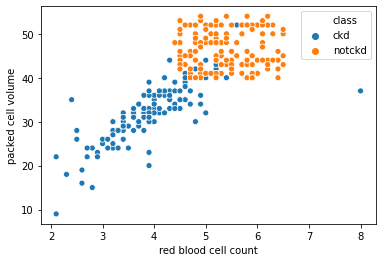

In [197]:
scatter('red blood cell count', 'packed cell volume')

        Observations:
        - There is a linear trend between red blood cell count and packed cell volumn.
        - Packed cell volumn range from ~8 to 40 and red blood cell count between 2 and 4.5 are mostly classified as 
        positive for chronic kidney disease (i.e ckd).

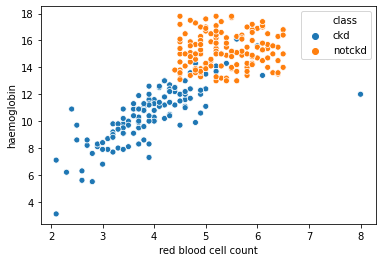

In [198]:
scatter('red blood cell count', 'haemoglobin')

        Observations:
        - There is a linear trend between red blood cell count and haemoglobin.
        - Haemoglobin range from 4 to 13 and red blood cell count between 2 and 4.5 are mostly classified as 
        positive for chronic kidney disease (i.e ckd).

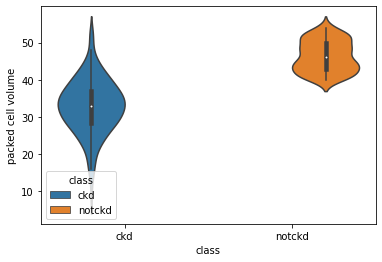

In [199]:
violin('packed cell volume')

        Observation:
        - Packed cell volumn range from 5 to ~37 are mostly classified as positive for chronic kidney disease (i.e ckd).

> #### Check for negative correlation and its impact on the class

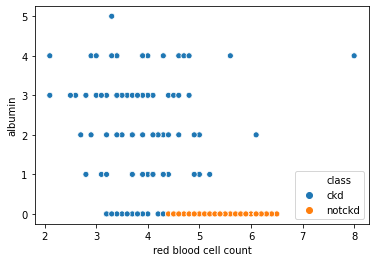

In [200]:
scatter('red blood cell count','albumin')

    We can clearly see that albumin levels of above 0 affect ckd largely.

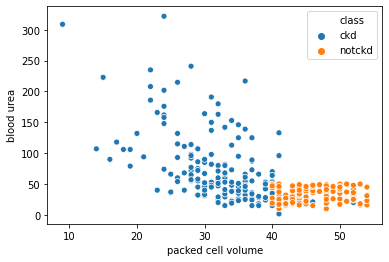

In [201]:
scatter('packed cell volume','blood urea')

    Packed cell volume >= 40 largely affects a class to be not ckd.

## DATA CLEANING

In [202]:
df.isna().sum().sort_values(ascending=False)

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
pus cell                    65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64

> Since we do not want to affect distributions of features during filling the missing values, we will use the **Random Value Imputation** technique. But first, we will try dealing with a single feature.

In [203]:
copy_df = df.copy()

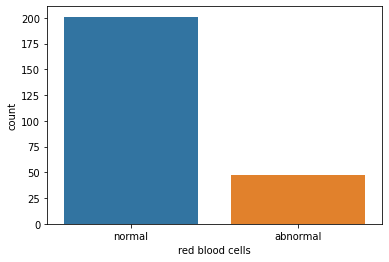

In [204]:
sns.countplot(df["red blood cells"])

In [205]:
copy_df["red blood cells"].isnull().sum()

152

    We will take 152 random samples from the copy of the DataFrame without null values and 
    then fill them in the real DataFrame after fitting the indexes for null values in these 2 DataFrames.

In [206]:
random_samples = copy_df["red blood cells"].dropna().sample(copy_df["red blood cells"].isnull().sum())
random_samples.head()

49       normal
73     abnormal
14       normal
314      normal
310      normal
Name: red blood cells, dtype: object

In [207]:
random_samples.index = copy_df[copy_df["red blood cells"].isnull()].index

In [208]:
#Fill the missing values by fitting the indexes of null values in random_samples and df.
df.loc[df["red blood cells"].isnull(),"red blood cells"] = random_samples

In [209]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,abnormal,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


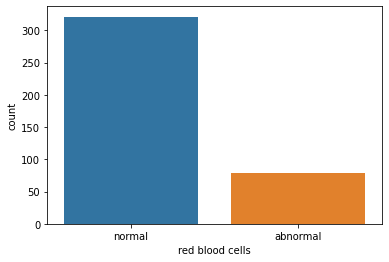

In [210]:
sns.countplot(df['red blood cells'])

    Although the number of null values has been reduced to 0 but the feature's distribution still remains the same. 

In [211]:
#Create a function so that we can easily fill missing values for all features
def Random_value_imputation(feature):
    copy_df = df.copy()
    random_samples = copy_df[feature].dropna().sample(copy_df[feature].isnull().sum())
    random_samples.index = copy_df[copy_df[feature].isnull()].index
    df.loc[df[feature].isnull(),feature] = random_samples

In [212]:
df[num_col].isna().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [213]:
#Fill all missing values in numerical features using random value imputation
for feature in num_col:
    Random_value_imputation(feature)

In [214]:
df[num_col].isna().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

In [215]:
df[cat_col].isna().sum()

red blood cells             0
pus cell                   65
pus cell clumps             4
bacteria                    4
ypertension                 2
diabetes mellitus           2
coronary artery disease     2
appetite                    1
pedal edema                 1
anemia                      1
class                       0
dtype: int64

As the number of missing values in pus cell is much higher than others, we will only use random value imputation for it and mode imputation for others.

In [216]:
Random_value_imputation("pus cell")

In [217]:
#Create mode imputation to fill the rest of missing values in categorical features
def mode_impute(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

In [218]:
for col in cat_col:
    mode_impute(col)

In [219]:
df[cat_col].isna().sum()

red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

    We have successfully filled all the missing values without affecting the disbutions of every features. Now, let move on 
    to Feature Engineering part.

## FEATURE ENGINEERING

### Feature Encoding

In [220]:
for col in cat_col:
    print("{} has {} categories".format(col,df[col].nunique()))

red blood cells has 2 categories
pus cell has 2 categories
pus cell clumps has 2 categories
bacteria has 2 categories
ypertension has 2 categories
diabetes mellitus has 2 categories
coronary artery disease has 2 categories
appetite has 2 categories
pedal edema has 2 categories
anemia has 2 categories
class has 2 categories


    We can easily notice that the numbers of unique values in each feature are very small. 
    It means that we can apply the Label Encoder technique to encode these categorical features 
    as it will not cause Curse of Dimensionality.

In [221]:
le = LabelEncoder()

In [222]:
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
#Change values of class to be more user-friendly: notckd = 0 and ckd = 1
df["class"].replace({0: 1, 1: 0}, inplace=True)

In [223]:
df.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,ypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,169.0,...,38.0,6000.0,3.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


### Feature Selection

In [224]:
#Split data into independent and dependent variables
X = df.drop("class",axis=1)
y = df["class"]

>After splitting the data, we will use **SelectKBest** to select k best features. **Chi2** will internally check that if p-value is less than 0.05 or not.  
Based on that, it will actually order all the features.

In [225]:
ordered_features = SelectKBest(score_func=chi2,k=X.shape[1]).fit(X,y) #Information Gain

In [226]:
#Using scores function to get scores of features
ordered_features.scores_

array([1.10135760e+02, 8.06422339e+01, 5.43503047e-03, 2.32895050e+02,
       1.07090300e+02, 1.08911734e+01, 1.39910383e+01, 2.52000000e+01,
       1.32000000e+01, 2.48736198e+03, 2.35738216e+03, 3.61804103e+02,
       2.59833967e+01, 5.03919817e+00, 1.25623042e+02, 3.03198250e+02,
       1.39531719e+04, 2.04732916e+01, 8.82000000e+01, 8.22000000e+01,
       2.04000000e+01, 4.92000000e+01, 4.56000000e+01, 3.60000000e+01])

In [227]:
#Convert array of scores into DataFrame
scores = pd.DataFrame(ordered_features.scores_,columns=["Score"])

In [228]:
#Create DataFrames from independent features
ind_features = pd.DataFrame(X.columns)

In [229]:
ordered_data = pd.concat([ind_features,scores],axis=1)
ordered_data.columns = ["Feature", "Score"]
ordered_data

,Feature,Score
0,age,110.135760
1,blood pressure,80.642234
2,specific gravity,0.005435
3,albumin,232.895050
4,sugar,107.090300
5,red blood cells,10.891173
6,pus cell,13.991038
7,pus cell clumps,25.200000
8,bacteria,13.200000
9,blood glucose random,2487.361975


In [230]:
#The higher the score is, the more important feature is 
selected_features = ordered_data.nlargest(10,"Score")["Feature"].values

In [231]:
final_X =  X[selected_features]

> We have successfully selected the top 10 important features, let's move on to **Modeling** part.

## **MODELING**





In this part, we will train our models using different ML algorithms. 

Since this is a **classification task**, we will use 2 algorthms in this project, namely:


1.   **Random Forest**
2.   **XGBoost Classifier**


Let's split our dataset into **train set** and **test set**.

In [232]:
#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(final_X,y,test_size=0.75,random_state=5)

> Here, we keep **25%** of the dataset for testing by assigning **`test_size=0.25`**, the **`random_state`** is set to 5 to guarantee that each time we run the code, the same sequences of random number are generated. 

In [233]:
print(X_train.shape)
print(X_test.shape)

(100, 10)
(300, 10)


In [234]:
#Check whether the dataset is imbalanced or not
y.value_counts()

1    250
0    150
Name: class, dtype: int64

In [235]:
print("Our baseline model is: {}".format(y.value_counts()[0]/len(y)))

Our baseline model is: 0.375


> It means that our models should have higher accuracy scores than the baseline model.

### ***1. Random Forest***


In [244]:
rf_model = RandomForestClassifier()

tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],
                     'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],
                     'random_state':[5]}]

clf = GridSearchCV(rf_model, tuned_parameters, cv=10, scoring='accuracy', n_jobs=-1)

clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'class_weight': [None, {0: 0.33, 1: 0.67},
                                           'balanced'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'n_estimators': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
                          'random_state': [5]}],
             scoring='accuracy')

> Here, we will choose parameters using GridSearchCV with 10-fold cross validations.

> The scoring is set to **`accuracy`** to compute the accuracy score of the model.
**`n_jobs=-1`** means that we will use all the processors to boost the running time.

Let's see how well this model performs!

In [249]:
y_pred = clf.predict(X_test)
print("Accuracy score is: ",accuracy_score(y_test, y_pred))

Accuracy score is:  0.96


> Here, we will use the **`accuracy`** score to see how accurately the model can predict on the **test set** when trained on the **train set**. 

> As displayed, the **Random forest** model can predict whether the result ckd or not with a high accuracy of ***96%***.

In [251]:
print("Test score:", clf.score(X_test, y_test))
print("Train score:", clf.score(X_train, y_train))

Test score: 0.96
Train score: 1.0


> > The train score is higher than the test score but the gap is not significant so we can conclude that it's **slightly overfitting** here. However, this model still **generalises very well** on ***unseen data***.

Let's plot a **confusion matrix** to see how many cases were predicted correctly/ incorrectly.

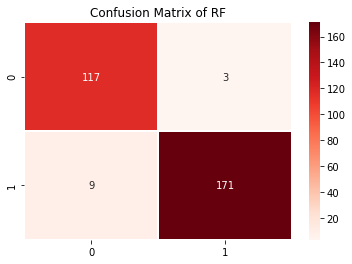

In [252]:
confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion, annot=True, fmt="d", linewidths=.5, cmap = 'Reds')
plt.title('Confusion Matrix of RF')
plt.show()

> The heatmap shows us that:  
* **117** of them were ***correctly*** classified as ***0 or notckd***.
* **3** were ***wrongly*** classified as ***1 or ckd***.
* **9** were ***wrongly*** classified as ***0 or notckd***
* **171** were ***correctly*** classified as ***1 or ckd***.

> ***! Warning***: Each time we run this notebook, the number will be different with the number mentioned above.


Let's calculate the **precision**, **recall** and **f1 score** for this model. In this case, the "**0**" will be **negative** class while "**1**" will be our **positive** class.

We will use the **`classification_report`** from **`sklearn.metrics`** library.


In [253]:
print("Detailed Classification Report:")

print(classification_report(y_test, y_pred))

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       120
           1       0.98      0.95      0.97       180

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



> We can see that the this model is very good at both tasks of predicting whether a person has chronic kidney disease or not since the scores for both ***class 0*** and ***class 1*** are so high.

> In this project, we should ask for a high recall score because we will try to avoid the situation that a person who actually has the disease is predicted not to have the disease. 

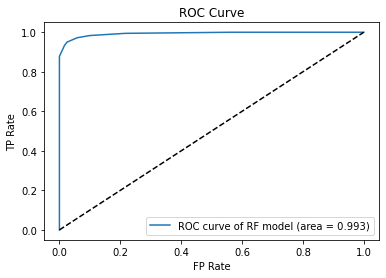

In [279]:
#Determine the false positive and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
roc_auc = auc(fpr,tpr) 

plt.figure(figsize=(6,4))    # Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve of RF model (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


> From this ROC curve, we can choose a thresold that help us balance the **sensitivity** (TP rate) and **specificity** (TN rate) based on our own preference. 

> Also, the AUC ROC value shows us that the performance of the model is very good to predict whether a person has chronic kidney disease or not.

### ***2. XGBoost Classifier***

In [280]:
XGB_model = XGBClassifier()

# Hyper Parameter Optimization with respect to XGBoost

params={
 "learning_rate"    : [0.05, 0.20, 0.25],
 "max_depth"        : [5, 8, 10, 12],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.7]
}

> For this model, we will choose parameters using RandomSearchCV with 5-fold cross validations.

In [283]:
filterwarnings('ignore')
random_search = RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5)
random_search.fit(X_train, y_train)

[16:19:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           num_parallel_tree=None,
                                           random_state=None, reg_alpha=None,
                                    

> We are doing a **random search** on 5 estimators. In this case, we created **25 models** since we have **5 estimators** and **5 folds** cross validation.  
> The scoring is set to **`roc_auc`** to compute the area under the ROC curve (ROC AUC) from prediction scores.
**`n_jobs=-1`** means that we will use all the processors to boost the running time.


In [287]:
print('Best score:', random_search.best_score_)
print('\n')
print('Best parameter:', random_search.best_params_)
print('\n')
print('Best estimator:', random_search.best_estimator_)

Best score: 0.9833333333333334


Best parameter: {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.7}


Best estimator: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


> We can see that the best score is **0.98** when the parameter are {'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 0.1, 'colsample_bytree': 0.7} and other paramaters settings. 

> We will use all these parameters to run our model!

In [304]:
best_XGB_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [305]:
best_XGB_model.fit(X_train, y_train)
print("The ROC AUC score is: ",best_XGB_model.score(X_test, y_test))

[16:33:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The ROC AUC score is:  0.96


> We can see that our best model return an accuracy score of **96%**, which is lower than the best score from the random search although we have fit the best parameters. Why this happened? 

> This can be explained by the fact that we are running our model on the test set whereas in the random search, we evaluate the model using cross validation. Since we have **5 folds** cross validation, the score is the **average** of the **5 models**, therefore, the score cannot be expected to be the same.

Let's calculate the score on training set to see if the model is overfitting or not!

In [308]:
print("Test score:", best_XGB_model.score(X_test, y_test))
print('Train score:', best_XGB_model.score(X_train, y_train))

Test score: 0.96
Train score: 1.0


> The train score is higher than the test score but the gap is not significant so we can conclude that it's **slightly overfitting** here. However, this model still **generalises very well** on ***unseen data***.

Let's evaluate the model using ROC AUC.

In [314]:
xgb_y_pred = best_XGB_model.predict(X_test)

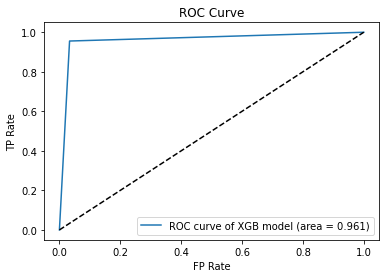

In [315]:
#Determine the false positive and true positive rates
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_y_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr) 

plt.figure(figsize=(6,4))    # Plot the ROC curve
plt.plot(xgb_fpr, xgb_tpr, label='ROC curve of XGB model (area = %0.3f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


> We can see that the AUC ROC value of 0.961 shows us that the performance of the model is very good to predict if a person has chronic kidney disease or not.

## **CONCLUSION**

In this project, we have used 2 different ML algorithms to predict whether a person has chronic kidney disease or not and the performances are as followed:

* **Random Forest Classifier**: ***96%*** accuracy and ***0.993*** AUC score. 
* **XGBoost Classifier**: ***96%*** accuracy and ***0.961*** AUC score.

All in all, these two models seem to perform well on this dataset with no sign of overfitting.

## References

- Machine Learning Real World Projects - Udemy
- Chronic Kidney Disease Dataset - Kaggle

# Thank you for your attention!

---